In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from delaunay_triangulation_2d import Delaunay2D
import matplotlib.collections

We follow the 2D Delaunay triangulation implementation by [Jose M. Espadero](http://github.com/jmespadero/pyDelaunay2D).

We first show the `scipy` implementation.

In [24]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)

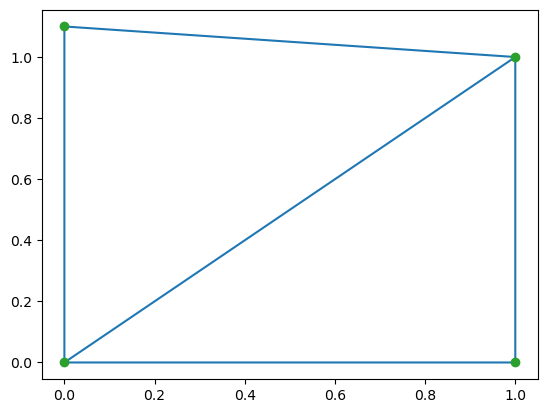

In [25]:
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

Generate random points in a square of size radius

In [26]:
# Generate random points in a square of size radius
num_points = 50
radius = 100
points = radius * np.random.random((num_points, 2))
print("Points:\n", points)
print(
    "BBox Min:", np.amin(points, axis=0), "Bbox Max: ", np.amax(points, axis=0)
)

Points:
 [[14.28524894 11.18160489]
 [10.059644   78.24954686]
 [64.99490079 25.16298712]
 [80.65333017 65.9102439 ]
 [ 2.23779517 30.9802221 ]
 [10.62555358 17.51710587]
 [36.23387545 26.11897287]
 [29.25399978 66.63511514]
 [58.43556434 26.97807198]
 [10.10382332 35.04680137]
 [ 9.14481868 10.82165207]
 [53.09025858 54.6138928 ]
 [58.78833638 45.88662031]
 [63.08177824 41.05319929]
 [56.80432663 33.90940882]
 [36.83377535 99.89611063]
 [71.65129996 14.68419077]
 [94.334798   79.12801706]
 [36.60469532 91.33527072]
 [14.19413648 21.33596186]
 [21.93906197 28.84914135]
 [40.50718026  5.33132916]
 [85.86887249 79.65700776]
 [23.64809792 86.13608155]
 [17.11619781  4.38514752]
 [22.62923897 38.77426837]
 [97.87076352 49.18031864]
 [23.4377315   3.11941018]
 [92.5719328  81.13209289]
 [57.76573157 18.80425505]
 [79.49944022 19.64204044]
 [29.54924552 86.02173425]
 [45.90099472 91.79005218]
 [99.68804226 93.25720687]
 [ 7.16815136 96.09653172]
 [91.5228235   3.15296788]
 [18.09123982 38.02

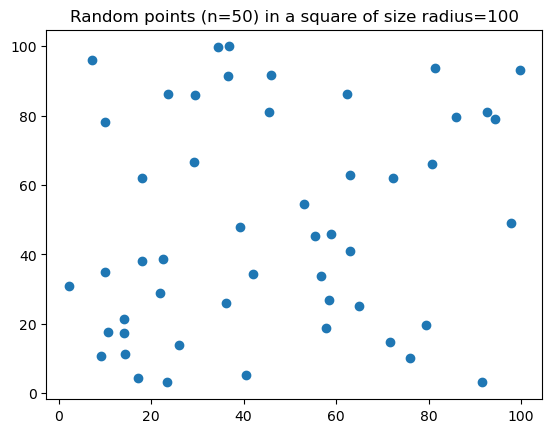

In [27]:
plt.plot(points[:, 0], points[:, 1], "o")
plt.title(f"Random points (n={num_points}) in a square of size radius={radius}")

plt.show()

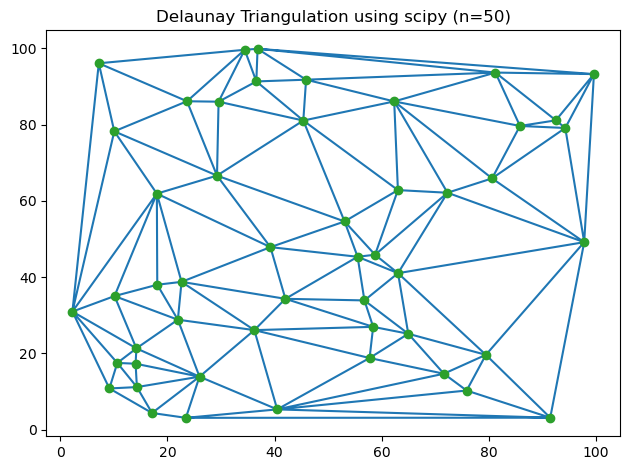

In [28]:
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.title(f"Delaunay Triangulation using scipy (n={num_points})")
plt.tight_layout()
plt.show()

We now switch to our custom implementation.

In [29]:
center = np.mean(points, axis = 0)
dt = Delaunay2D(center, 50 * radius)

for p in points:
    dt.add_point(p)

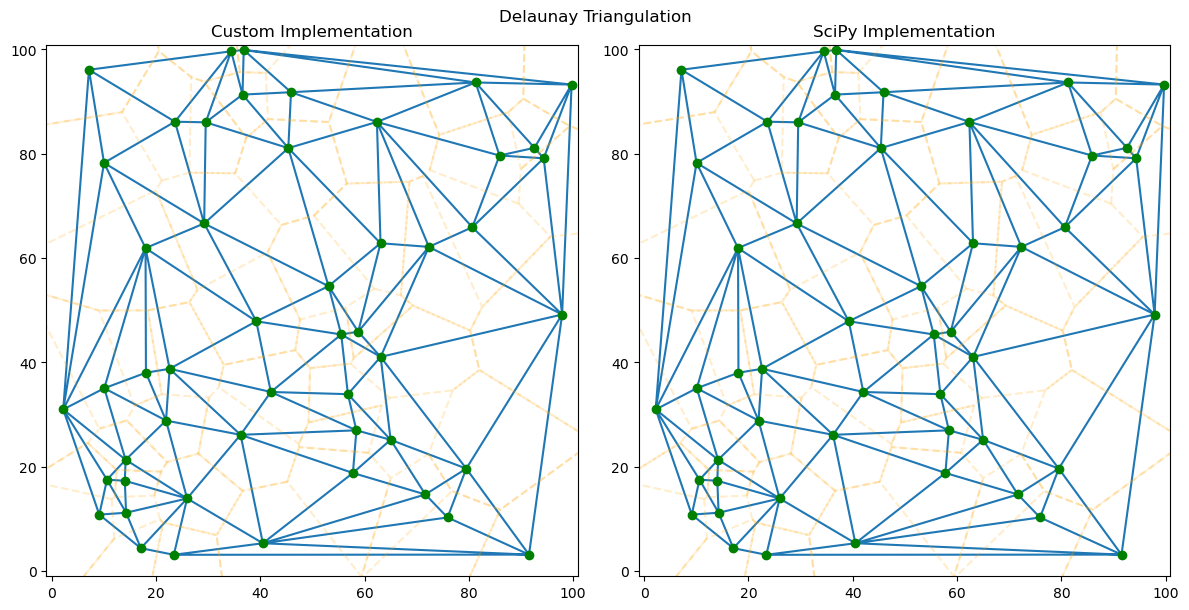

In [30]:
# Set the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

# Plot for Custom Delaunay Triangulation on the left
cx, cy = zip(*points)
dt_tris = dt.export_triangles()
ax[0].triplot(matplotlib.tri.Triangulation(cx, cy, dt_tris), "-")
vc, vr = dt.export_voronoi_regions()

for r in vr:
    polygon = [vc[i] for i in vr[r]]  # build polygon for each region
    ax[0].plot(*zip(*polygon), "--", color="orange", alpha=0.2)
    ax[1].plot(*zip(*polygon), "--", color="orange", alpha=0.2)

ax[0].scatter(cx, cy, color='green')
ax[0].set_title("Custom Implementation")
ax[0].margins(0.1)
ax[0].set_aspect('equal')
ax[0].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Plot for SciPy Delaunay Triangulation on the right
ax[1].triplot(points[:, 0], points[:, 1], tri.simplices)
ax[1].plot(points[:, 0], points[:, 1], 'o', color='green')
ax[1].set_title("SciPy Implementation")
ax[1].margins(0.1)
ax[1].set_aspect('equal')
ax[1].axis([-1, np.max(points) + 1, -1, np.max(points) + 1])

# Setting a title for the whole figure instead of individual plots
fig.suptitle("Delaunay Triangulation")

plt.tight_layout()
plt.show()